In [1]:
from matplotlib import pyplot as plt
import numpy as np

from utils import get_data

In [2]:
def GP(data: np.array, k: int, ln_ls: np.array) -> np.array:
    """My implementation of Grassberger-Procaccia algorithm.
    """
    omegas = data[np.arange(len(data) + 1 - k)[:, None] + np.arange(k)]
    ros = np.linalg.norm(omegas[:, None] - omegas, axis=2)
    return np.log((ros[None] - np.exp(ln_ls)[:, None, None] < 0).mean(axis=(1, 2)))

In [3]:
data = get_data('Apple')  # More infomation about my data collection in utils.py file
ks = range(1, 8)  # ks number was chosen arbitrary
ln_ls = np.arange(-4, 4, 0.1)

ln_Cs = {}
for i in ks:
    ln_Cs[i] = GP(data, i, ln_ls)

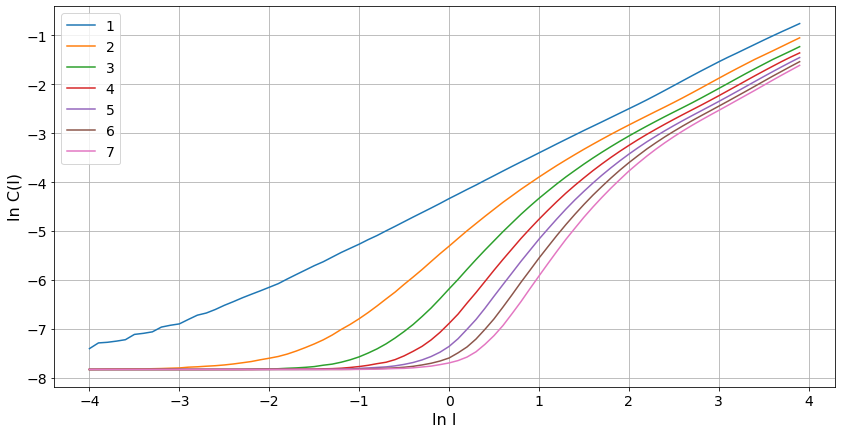

In [4]:
# Simple plotting
fontsize = 14
plt.figure(figsize=(14, 7))
for i in ks:
    plt.plot(ln_ls, ln_Cs[i], label=i)
plt.legend(fontsize=fontsize)
plt.xlabel('ln l', fontsize=fontsize+2)
plt.ylabel('ln C(l)', fontsize=fontsize+2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.grid()
plt.show()

As can be easily deduced from the graph, the optimal $k$ value is $5$.